In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress
import numpy as np

In [2]:
data = pd.read_csv('../../data/reorganization_energy_data_ECFP4_clean.csv')

In [3]:
dimers = pd.read_csv('../../data/Dimers_for_ML_v2.csv')

In [4]:
dimers['Monomer 1'] = dimers['Monomer 1'].astype('int')
dimers['Monomer 2'] = dimers['Monomer 2'].astype('int')

In [5]:
dimers = dimers[['Monomer 1','Monomer 2','DFT λ']].rename(columns = {'DFT λ':'Dimer DFT λ'})

In [6]:
tetramers = data[data['Oligomer Length'] == 4][['Monomer 1','Monomer 2','DFT λ']].rename(columns = {'DFT λ':'Tetramer DFT λ'})
hexamers = data[data['Oligomer Length'] == 6][['Monomer 1','Monomer 2','DFT λ']].rename(columns = {'DFT λ':'Hexamer DFT λ'})

In [7]:
full_df = tetramers.merge(hexamers, on = ['Monomer 1', 'Monomer 2']).merge(dimers, on = ['Monomer 1', 'Monomer 2'])

In [8]:
full_df

,Monomer 1,Monomer 2,Tetramer DFT λ,Hexamer DFT λ,Dimer DFT λ
0,1,50,0.258911,0.217508,0.307563
1,11,96,0.377119,0.353820,0.454873
2,18,95,0.831329,0.586291,0.796666
3,24,33,0.601558,0.702526,0.681883
4,24,67,0.865501,0.448368,0.093461
...,...,...,...,...,...
399,63,66,0.682021,0.798734,0.511375
400,64,66,0.650369,0.584426,0.654329
401,69,94,0.632481,0.599885,0.605964
402,8,47,0.399026,0.347894,0.424219


In [9]:
full_df = full_df[full_df['Dimer DFT λ'] > 0]

In [10]:
full_df.head()

,Monomer 1,Monomer 2,Tetramer DFT λ,Hexamer DFT λ,Dimer DFT λ
0,1,50,0.258911,0.217508,0.307563
1,11,96,0.377119,0.353820,0.454873
2,18,95,0.831329,0.586291,0.796666
3,24,33,0.601558,0.702526,0.681883
4,24,67,0.865501,0.448368,0.093461


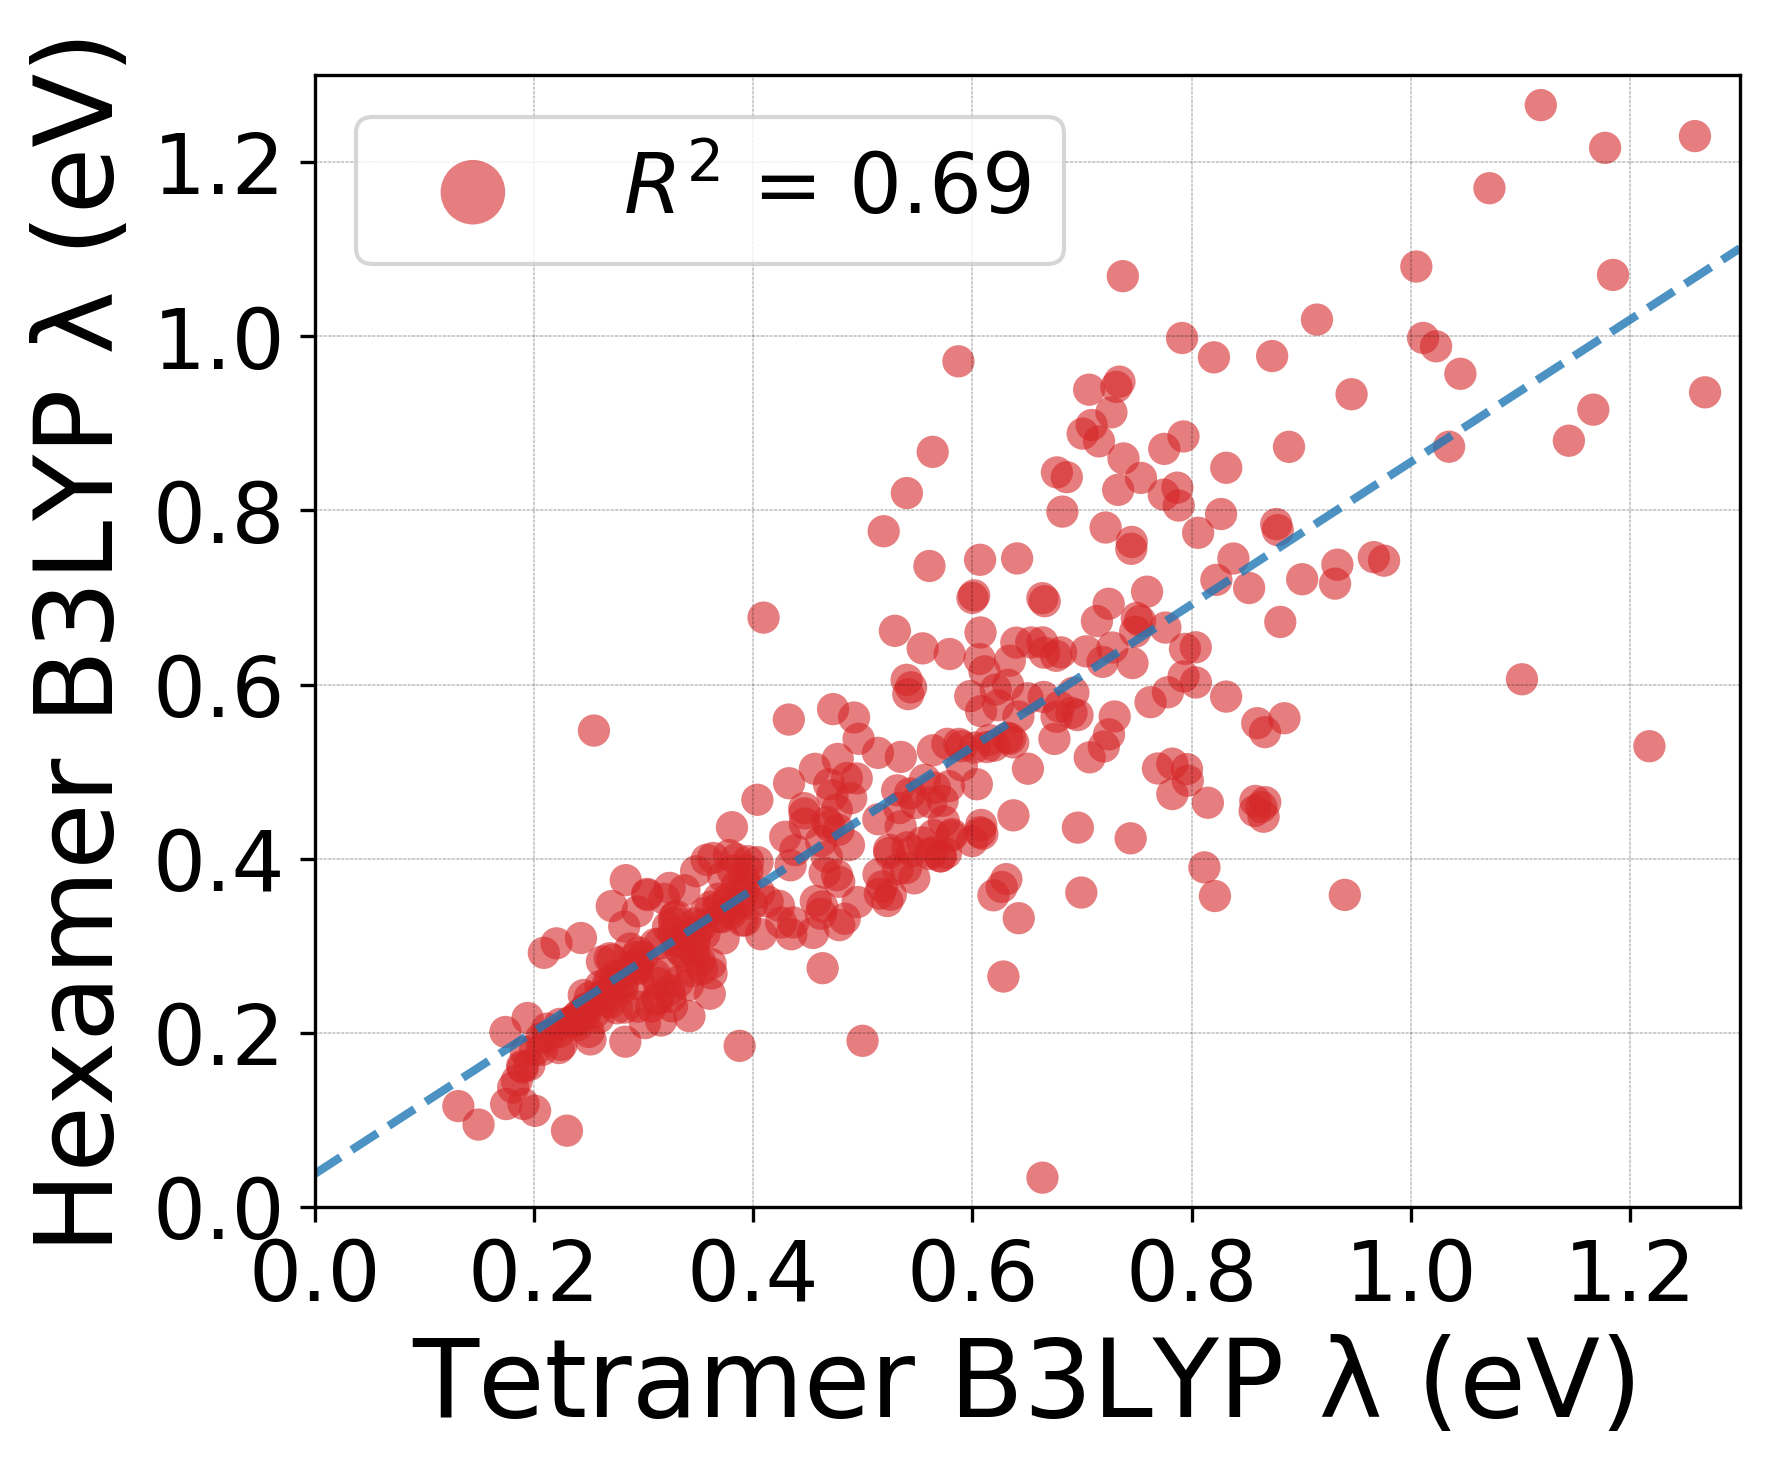

In [14]:
fig=plt.figure(figsize=(6, 5), dpi= 300, facecolor='w', edgecolor='k')
reg_x = np.arange(0,1.4,0.1)
plt.xlim(0,1.3)
plt.ylim(0,1.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(color='k', ls = '-.', lw = 0.1)
sct = plt.scatter(full_df['Tetramer DFT λ'],full_df['Hexamer DFT λ'], color = 'tab:red', alpha = 0.6, edgecolors = 'none', s = 60)
slope, intercept, r_value, p_value, std_err = linregress(full_df['Tetramer DFT λ'],full_df['Hexamer DFT λ'])
plt.plot(reg_x,slope*reg_x + intercept, c = 'tab:blue',ls = '--', lw = 2, alpha = 0.8)
plt.xlabel('Tetramer B3LYP λ (eV)', fontsize = 26)
plt.ylabel('Hexamer B3LYP λ (eV)', fontsize = 26)
plt.legend([sct],['$R^2$ = {:.2f}'.format(r_value**2)], loc = 2, fontsize = 20, markerscale = 2)
plt.tight_layout()
#plt.savefig('tetramers_hexamers_length_correlation.png')
#plt.savefig('tetramers_hexamers_length_correlation.pdf')
plt.show()

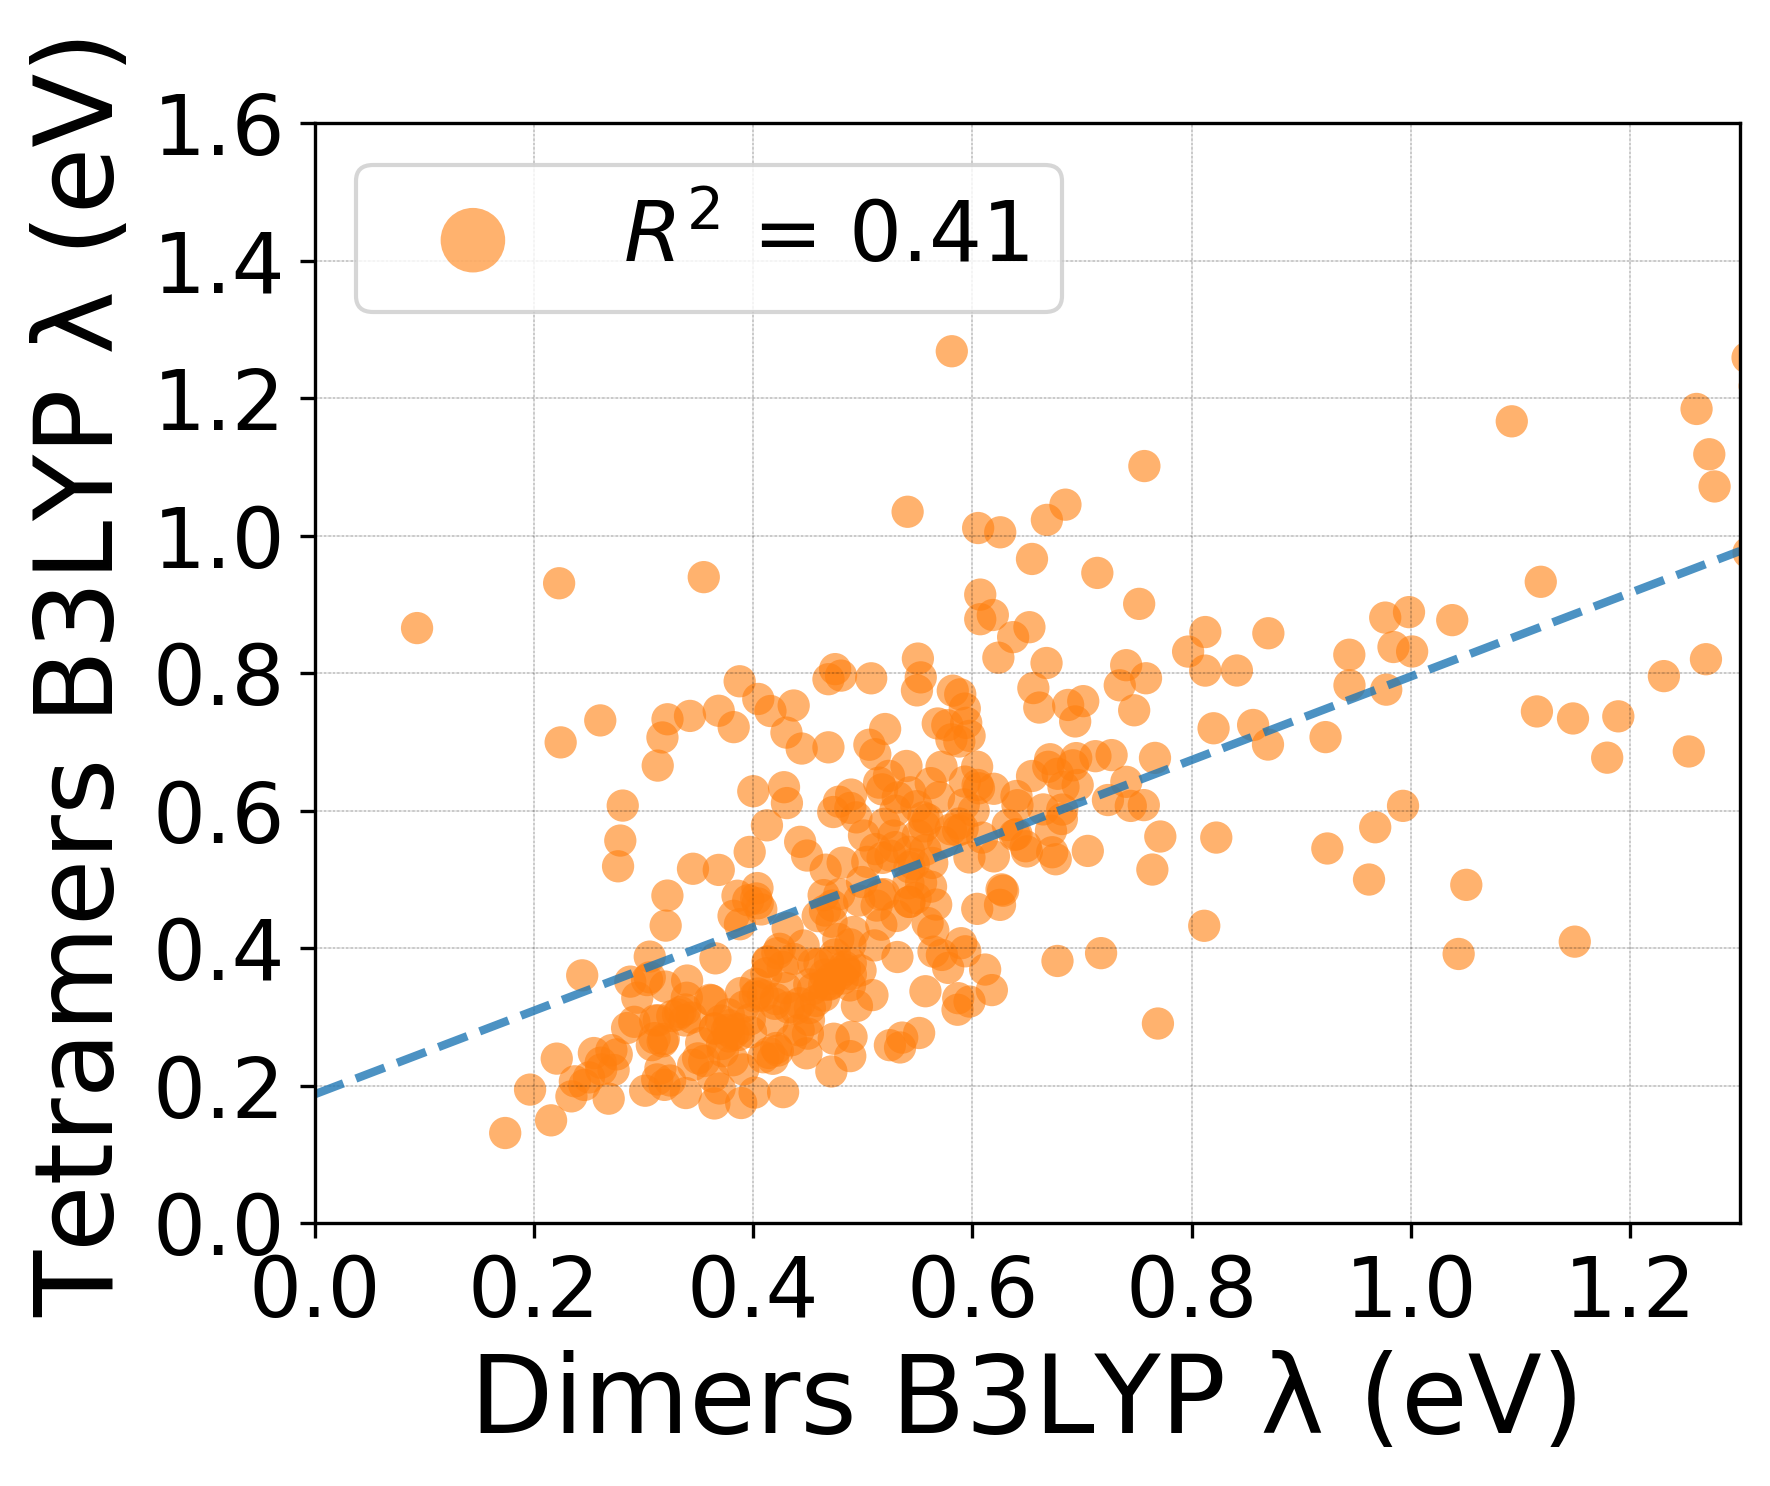

In [15]:
fig=plt.figure(figsize=(6, 5), dpi= 300, facecolor='w', edgecolor='k')
reg_x = np.arange(0,1.4,0.1)
plt.xlim(0,1.3)
plt.ylim(0,1.6)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(color='k', ls = '-.', lw = 0.1)
sct = plt.scatter(full_df['Dimer DFT λ'], full_df['Tetramer DFT λ'], color = 'tab:orange', alpha = 0.6, edgecolors = 'none', s = 60)
slope, intercept, r_value, p_value, std_err = linregress(full_df['Dimer DFT λ'], full_df['Tetramer DFT λ'])
plt.plot(reg_x,slope*reg_x + intercept, c = 'tab:blue',ls = '--', lw = 2, alpha = 0.8)
plt.xlabel('Dimers B3LYP λ (eV)', fontsize = 26)
plt.ylabel('Tetramers B3LYP λ (eV)', fontsize = 26)
plt.legend([sct],['$R^2$ = {:.2f}'.format(r_value**2)], loc = 2, fontsize = 20, markerscale = 2)
plt.tight_layout()
#plt.savefig('tetramers_dimers_length_correlation.png')
#plt.savefig('tetramers_dimers_length_correlation.pdf')
plt.show()

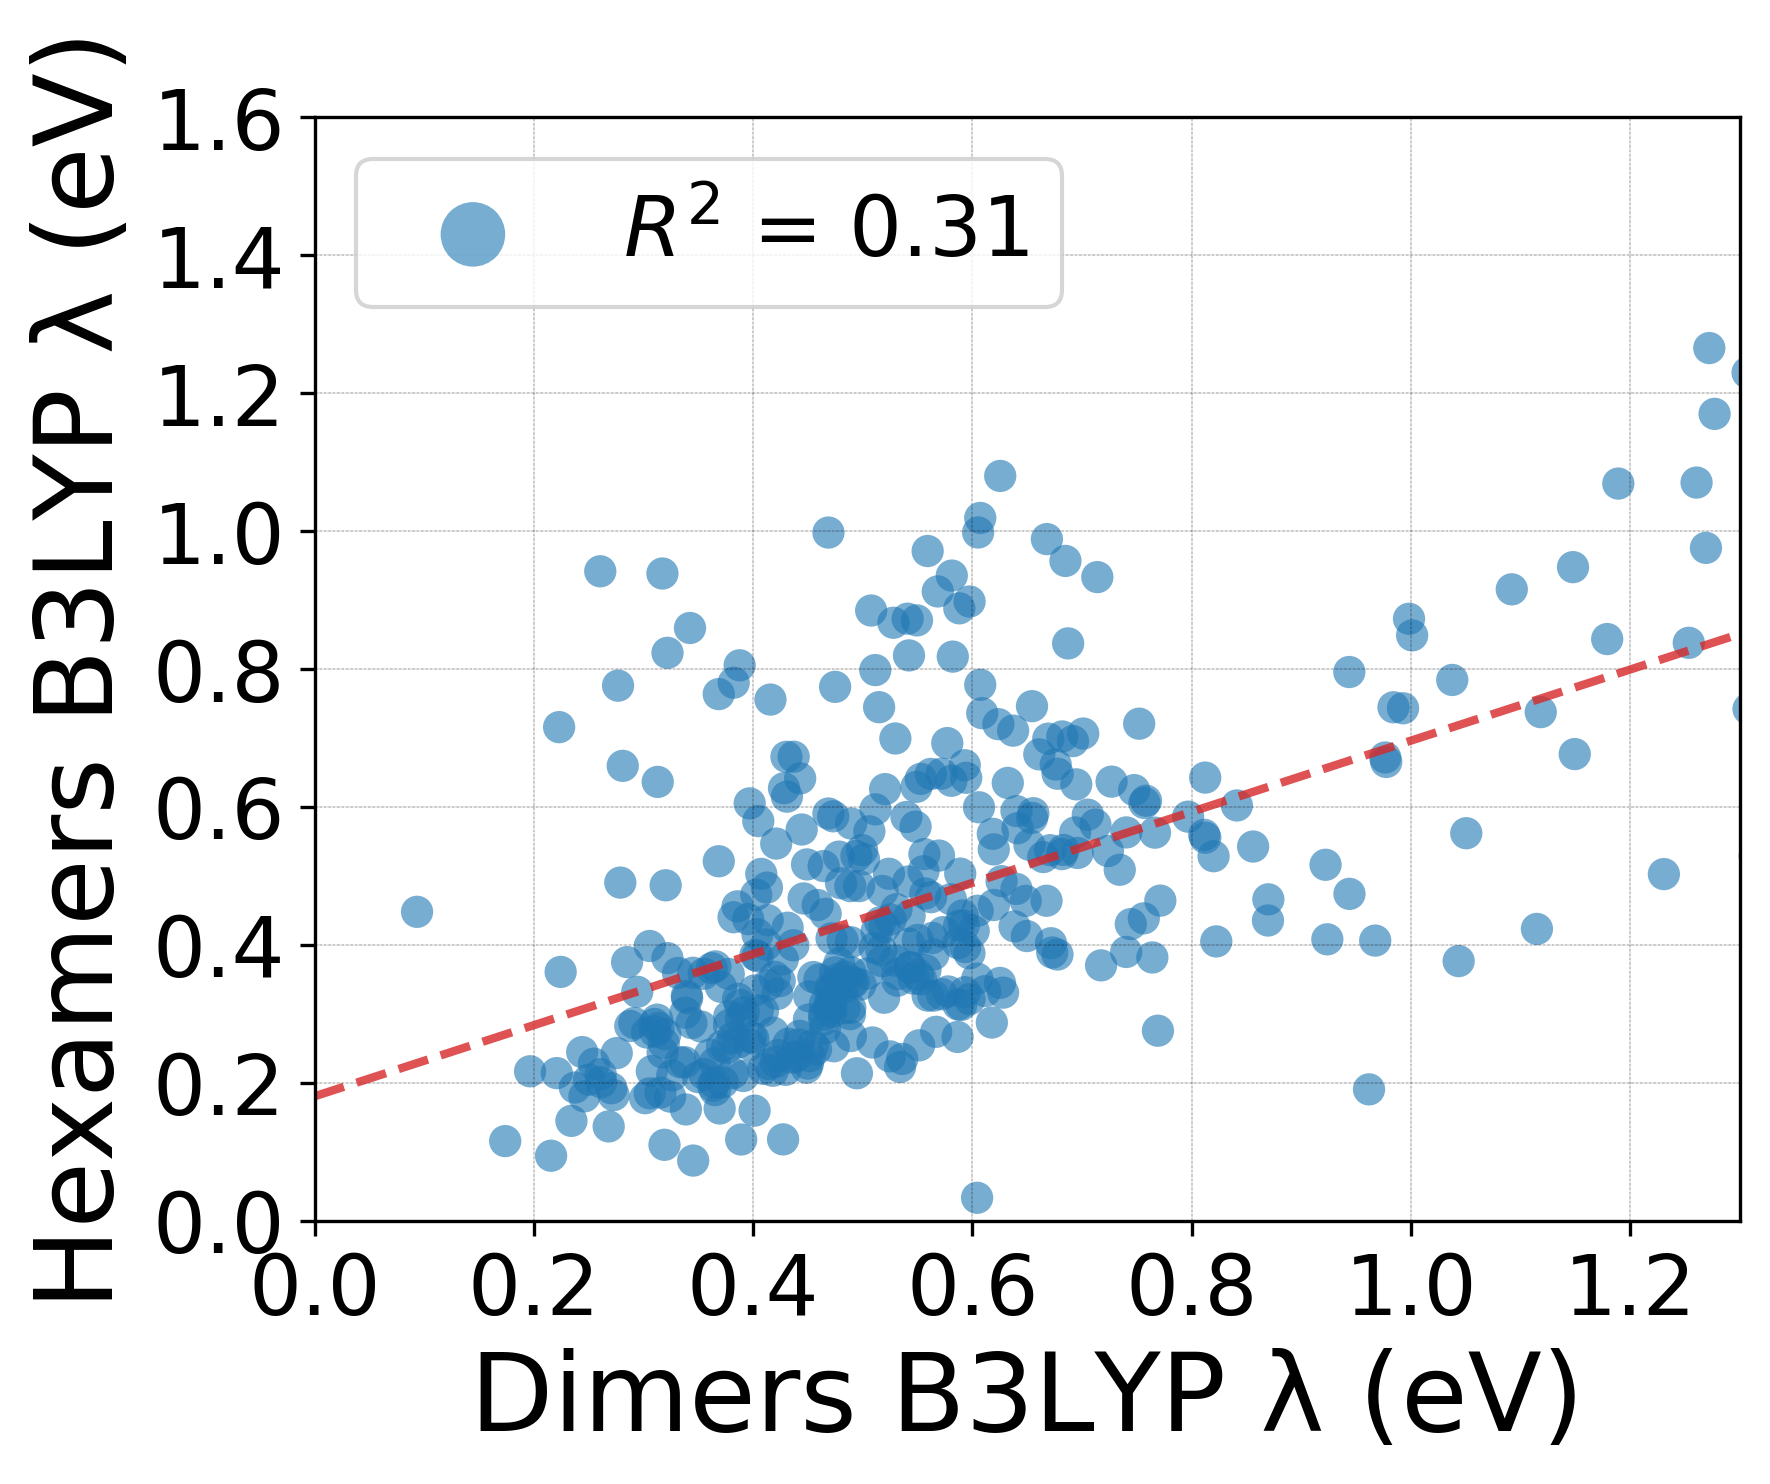

In [16]:
fig=plt.figure(figsize=(6, 5), dpi= 300, facecolor='w', edgecolor='k')
reg_x = np.arange(0,1.4,0.1)
plt.xlim(0,1.3)
plt.ylim(0,1.6)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(color='k', ls = '-.', lw = 0.1)
sct = plt.scatter(full_df['Dimer DFT λ'],full_df['Hexamer DFT λ'], color = 'tab:blue', alpha = 0.6, edgecolors = 'none', s = 60)
slope, intercept, r_value, p_value, std_err = linregress(full_df['Dimer DFT λ'], full_df['Hexamer DFT λ'])
plt.plot(reg_x,slope*reg_x + intercept, c = 'tab:red',ls = '--', lw = 2, alpha = 0.8)
plt.xlabel('Dimers B3LYP λ (eV)', fontsize = 26)
plt.ylabel('Hexamers B3LYP λ (eV)', fontsize = 26)
plt.legend([sct],['$R^2$ = {:.2f}'.format(r_value**2)], loc = 2, fontsize = 20, markerscale = 2)
plt.tight_layout()
#plt.savefig('dimers_hexamers_length_correlation.png')
#plt.savefig('dimers_hexamers_length_correlation.pdf')
plt.show()